# Import Libraries

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# The Data

In [4]:
train = pd.read_csv(r"C:\Users\Dell\Documents\Bharat Intern\titanic\train.csv")
test = pd.read_csv(r"C:\Users\Dell\Documents\Bharat Intern\titanic\test.csv")

# Data Preprocessing 

In [5]:
# Rows and Columns
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# The info function tells about the information and its also tell about null value and how many missing values are there 

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Now we delete the cabin column because it has higher missing values 

train.drop(columns = ['Cabin'],inplace = True)
test.drop(columns = ['Cabin'],inplace = True)

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [11]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
# Now we fill values in the missing values 

train['Embarked'].fillna('S',inplace = True)

In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [14]:
test['Fare'].fillna(test['Fare'].mean(),inplace = True)

In [15]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [16]:
# We checked and find that 20 perecent null values is there so we will delete it the ans is No because everytime we will not delete the missing values
# its effect the accuracy,So we can fill this values 
(177/891)*100

19.865319865319865

In [17]:
#For train table lower mean and higher mean
train_age = np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean() + train['Age'].std(),177)
train_age

array([16, 32, 23, 19, 21, 39, 15, 25, 30, 32, 31, 25, 21, 30, 15, 42, 18,
       26, 32, 33, 23, 36, 23, 15, 27, 40, 31, 42, 25, 19, 40, 17, 23, 42,
       41, 17, 19, 32, 38, 43, 28, 33, 21, 18, 22, 24, 32, 27, 26, 26, 38,
       27, 28, 25, 38, 32, 18, 30, 36, 32, 21, 43, 29, 31, 42, 18, 16, 29,
       26, 19, 38, 30, 38, 33, 41, 15, 22, 32, 16, 21, 26, 25, 21, 26, 41,
       19, 18, 28, 32, 24, 24, 34, 27, 23, 15, 27, 15, 21, 31, 36, 18, 26,
       19, 21, 25, 32, 20, 24, 27, 31, 33, 19, 41, 43, 34, 36, 25, 15, 25,
       43, 28, 40, 34, 18, 40, 39, 21, 36, 37, 38, 34, 19, 40, 20, 35, 27,
       30, 27, 24, 28, 38, 17, 22, 15, 26, 32, 20, 26, 33, 29, 39, 42, 19,
       38, 38, 20, 37, 23, 38, 26, 28, 29, 25, 31, 42, 24, 31, 22, 27, 43,
       30, 43, 19, 27, 42, 25, 21])

In [18]:
# For test table lower mean and higher mean

test_age = np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean() + test['Age'].std(),86)
test_age

array([40, 21, 35, 28, 28, 30, 17, 28, 34, 42, 33, 20, 32, 25, 16, 39, 32,
       34, 35, 30, 21, 33, 38, 22, 37, 34, 39, 39, 39, 40, 33, 20, 22, 25,
       43, 20, 28, 24, 39, 33, 18, 24, 42, 38, 29, 36, 41, 16, 16, 38, 21,
       16, 16, 41, 25, 41, 33, 20, 33, 28, 24, 37, 31, 29, 24, 27, 22, 36,
       24, 27, 43, 32, 41, 23, 17, 36, 34, 24, 42, 18, 21, 23, 40, 38, 20,
       19])

In [19]:
train['Age'][train['Age'].isnull()] = train_age

C:\Users\Dell\AppData\Local\Temp\ipykernel_9976\1833702416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()] = train_age


In [20]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
test['Age'][test['Age'].isnull()] = test_age

C:\Users\Dell\AppData\Local\Temp\ipykernel_9976\4013316382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()] = test_age


In [22]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# EDA (Exploratory Data Analysis)

In [23]:
# Is there any columns make a difference in survival or death 

In [24]:
train[train['Pclass']==1]['Survived'].value_counts()

1    136
0     80
Name: Survived, dtype: int64

In [25]:
train.groupby(['Pclass', 'Survived'])['Survived'].mean()

Pclass  Survived
1       0           0.0
        1           1.0
2       0           0.0
        1           1.0
3       0           0.0
        1           1.0
Name: Survived, dtype: float64

In [26]:
119/(372+119)

0.24236252545824846

In [27]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [28]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [29]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

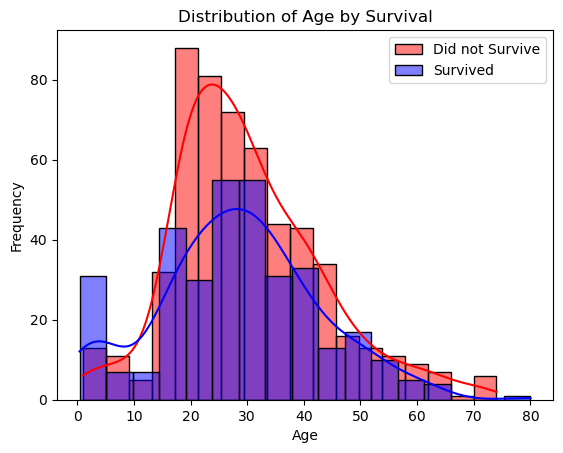

In [30]:
# Assuming you have a DataFrame 'train' with 'Age' and 'Survived' columns

sns.histplot(train['Age'][train['Survived'] == 0], kde=True, label='Did not Survive', color='red')
sns.histplot(train['Age'][train['Survived'] == 1], kde=True, label='Survived', color='blue')

# Customize the plot as needed (e.g., labels, title, legend)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age by Survival')
plt.legend()
plt.show()


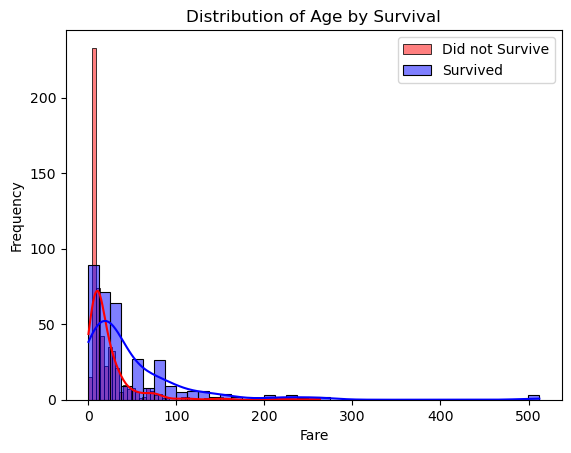

In [31]:
# Assuming you have a DataFrame 'train' with 'Fare' and 'Survived' columns

sns.histplot(train['Fare'][train['Survived'] == 0], kde=True, label='Did not Survive', color='red')
sns.histplot(train['Fare'][train['Survived'] == 1], kde=True, label='Survived', color='blue')

# Customize the plot as needed (e.g., labels, title, legend)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Age by Survival')
plt.legend()
plt.show()


In [32]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [33]:
train.drop(columns = ['Ticket'],inplace = True)
test.drop(columns = ['Ticket'],inplace = True)

In [34]:
# Here I creates the family column in train table 
train['family'] = train['SibSp'] + train['Parch'] + 1

In [35]:
# Here I creates the family column in test table 
test['family'] = test['SibSp'] + test['Parch'] + 1

In [36]:
train['family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family, dtype: int64

In [37]:
train.groupby(['family'])['Survived'].mean()

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [38]:
def cal(number):
    if number == 1:
        return "Alone"
    elif number > 1 and number < 5:
        return "Medium"
    else:
        return "Large"

In [39]:
train['family_size'] = train['family'].apply(cal)

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Alone


In [41]:
test['family_size'] = test['family'].apply(cal)

In [42]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family,family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,Alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,Medium
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,Alone
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,Alone
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3,Medium


In [43]:
train.drop(columns =['SibSp','Parch','family'],inplace = True)
test.drop(columns =['SibSp','Parch','family'],inplace = True)

In [44]:
print(train.shape)
print(test.shape)

(891, 9)
(418, 8)


In [45]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Fare           0
Embarked       0
family_size    0
dtype: int64

In [46]:
passengerId = test['PassengerId'].values

In [47]:
train.drop(columns=['Name', 'PassengerId'],inplace=True)

In [48]:
test.drop(columns=['Name','PassengerId'],inplace=True)

In [49]:
train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
family_size    0
dtype: int64

# Now we know that The algorithm always apply on numerical value 
# So We converted all the Categorical values into numerical values

In [50]:
train.shape

(891, 7)

In [51]:
train = pd.get_dummies(train, columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [52]:
train.shape

(891, 10)

In [53]:
test = pd.get_dummies(test, columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [54]:
test.shape

(418, 9)

In [55]:
X = train.iloc[:,1].values
y = train.iloc[:,0].values

# Train Test Split

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [57]:
X_train = X_train.reshape(-1, 1)


# Decision Tree Classifiction

In [58]:
from sklearn.tree import DecisionTreeClassifier


In [59]:
# Reshape X_train to be a 2D array
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [60]:
# Initialize the DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [61]:
# Fit the classifier on the training data
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [62]:
# Make predictions on the test data
y_pred = classifier.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.5754189944134078

In [64]:
Xf = test.iloc[:,:].values

In [65]:
# Assuming you want to use the first feature from Xf
Xf_single_feature = Xf[:, 0].reshape(-1, 1)  # Reshape to 2D array
y_final = classifier.predict(Xf_single_feature)


In [66]:
y_final.shape

(418,)

In [67]:
passengerId.shape

(418,)

In [68]:
final=pd.DataFrame()

In [69]:
final

""


In [70]:
final['passengerId']=passengerId
final['survived']=y_final

In [71]:
final

,passengerId,survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [72]:
final.to_csv('submission.csv',index=False)